In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  as sk

redwine = pd.read_csv("winequality-red.csv", sep=";")
red_value = ['red']
redwine['type'] = red_value * 1599
whitewine = pd.read_csv("winequality-white.csv", sep=";")
white_value = ['white']
whitewine['type'] = white_value * 4898
combined_wine = pd.concat([redwine, whitewine], ignore_index=True)
combined_wine.to_csv("combined_wine.csv", index=False)


# Display the first few rows of the datasets to understand their structure
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
combined_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
combined_wine_copy = combined_wine.copy() # Create a copy of the combined dataset

Encoding 

In [5]:
combined_wine_copy['type'].replace({'red': 0, 'white': 1}, inplace=True) # Convert 'type' to numerical values

# cat_cols = combined_wine_copy.select_dtypes('object') # Identify categorical columns
# cat_cols_encode = pd.get_dummies(cat_cols) # One-hot encode categorical columns
# combined_wine_copy = pd.concat([combined_wine_copy, cat_cols_encode], axis=1) # Concatenate the encoded columns with the original dataset
# combined_wine_copy.drop('type', axis=1, inplace=True) # Drop the original 'type' column
# combined_wine_copy = pd.concat([combined_wine_copy, cat_cols_encode], axis=1) # Concatenate the encoded columns with the original dataset
combined_wine_copy.head() # Display the first few rows of the modified dataset


/var/folders/ms/kffv8scn23l62n_5h2kgw9sw0000gn/T/ipykernel_24137/2097320639.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_wine_copy['type'].replace({'red': 0, 'white': 1}, inplace=True) # Convert 'type' to numerical values
/var/folders/ms/kffv8scn23l62n_5h2kgw9sw0000gn/T/ipykernel_24137/2097320639.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beha

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Split Data

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = combined_wine_copy.drop('type', axis=1) # Features
y = combined_wine_copy['type'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets


In [7]:
y_test.shape

(1300,)

Building Model

In [8]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(random_state=42,max_iter=100) # Initialize the Logistic Regression model

In [9]:
LR_model.fit(X_train, y_train) # Fit the model to the training data

/opt/anaconda3/envs/CAB_V1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [10]:
preds = LR_model.predict(X_test) # Make predictions on the test set

In [11]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3103,7.0,0.170,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8
1419,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
4761,6.8,0.390,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7
4690,6.3,0.280,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6
4032,7.4,0.350,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
889,10.7,0.900,0.34,6.6,0.112,23.0,99.0,1.00289,3.22,0.68,9.3,5
2850,5.7,0.245,0.33,1.1,0.049,28.0,150.0,0.99270,3.13,0.42,9.3,5
4917,6.6,0.160,0.35,1.8,0.042,26.0,105.0,0.98962,3.19,0.75,12.4,7
5198,6.6,0.390,0.38,9.7,0.053,49.0,226.0,0.99787,3.30,0.57,9.4,6


In [12]:
y_test

3103    1
1419    0
4761    1
4690    1
4032    1
       ..
889     0
2850    1
4917    1
5198    1
5643    1
Name: type, Length: 1300, dtype: int64

In [13]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': preds
})
print("Method 1: Simple DataFrame Comparison")
print(comparison_df.head(10))
print("\n")

Method 1: Simple DataFrame Comparison
      Actual  Predicted
3103       1          1
1419       0          1
4761       1          1
4690       1          1
4032       1          1
1297       0          0
1773       1          1
5584       1          1
561        0          1
5946       1          1




In [14]:
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix,classification_report

acc = accuracy_score(y_test, preds) # Calculate accuracy
print(acc) # Print accuracy

0.9730769230769231


In [15]:
# Create DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': preds
})

# Add original features from X_test for context
comparison_df = pd.concat([X_test.reset_index(drop=True), comparison_df], axis=1)

# Add a column to show if prediction was correct
comparison_df['Correct_Prediction'] = comparison_df['Actual'] == comparison_df['Predicted']

# Make it more readable by mapping 0/1 to Red/White
comparison_df['Actual_Type'] = comparison_df['Actual'].map({0: 'Red', 1: 'White'})
comparison_df['Predicted_Type'] = comparison_df['Predicted'].map({0: 'Red', 1: 'White'})
comparison_df.head(10) # Display the first 10 rows of the comparison DataFrame

# Export to CSV
# comparison_df.to_csv('wine_predictions_comparison.csv', index=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Actual,Predicted,Correct_Prediction,Actual_Type,Predicted_Type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8.0,NaN,NaN,False,NaN,NaN
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5.0,NaN,NaN,False,NaN,NaN
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7.0,NaN,NaN,False,NaN,NaN
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6.0,NaN,NaN,False,NaN,NaN
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6.0,NaN,NaN,False,NaN,NaN
5,7.2,0.53,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,6.0,NaN,NaN,False,NaN,NaN
6,7.5,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5.0,NaN,NaN,False,NaN,NaN
7,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6.0,NaN,NaN,False,NaN,NaN
8,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,5.0,0.0,0.0,True,Red,Red
9,7.1,0.23,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.3,7.0,NaN,NaN,False,NaN,NaN


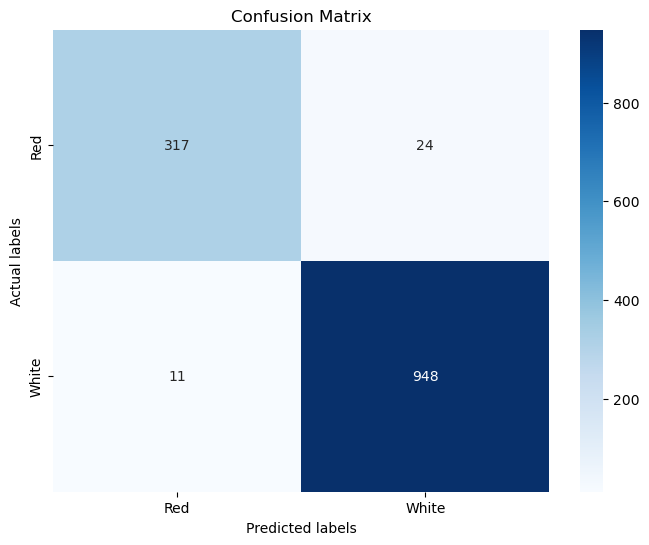

In [16]:
#create a confusion matrix

conf_matrix = confusion_matrix(y_test, preds)

#create a visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Red', 'White'], yticklabels=['Red', 'White'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()